# 3) US Baby Names 1880–2017

Podatki: http://www.ssa.gov/oact/babynames/limits.html.

In [ ]:
#podatke imamo v veliko različnih fajlih

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

from collections import defaultdict
from collections import Counter

In [1]:
!head -n 10 data/DATA_03_names/yob1880.txt

In [3]:
#najprej uvozimo en text datoteko
names1880 = pd.read_csv('data/DATA_03_names/yob1880.txt',
                        names = ['ime', 'spol', 'stevilo']
                       )

In [4]:
names1880.head()

,ime,spol,stevilo
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
#preštejemo število žensk in moških, rojenih v letu 1880
names1880.groupby('spol')['stevilo'].sum()

spol
F     90993
M    110491
Name: stevilo, dtype: int64

In [6]:
#oz vse podatke vseh let v en data frame
years = range(1880, 2018)
pieces=[] #sem notri shranimo vsak fajl posebej
columns =  ['ime', 'spol', 'stevilo']


In [8]:
for year in years:
    path = f'data/DATA_03_names/yob{year}.txt'
    frame = pd.read_csv(path, names = columns)
    frame['leto'] = year
    pieces.append(frame) #dodamo data frame v pieces

In [9]:
#pieces je list dataframe-ov
pieces


[            ime spol  stevilo  leto
 0          Mary    F     7065  1880
 1          Anna    F     2604  1880
 2          Emma    F     2003  1880
 3     Elizabeth    F     1939  1880
 4        Minnie    F     1746  1880
 5      Margaret    F     1578  1880
 6           Ida    F     1472  1880
 7         Alice    F     1414  1880
 8        Bertha    F     1320  1880
 9         Sarah    F     1288  1880
 10        Annie    F     1258  1880
 11        Clara    F     1226  1880
 12         Ella    F     1156  1880
 13     Florence    F     1063  1880
 14         Cora    F     1045  1880
 15       Martha    F     1040  1880
 16        Laura    F     1012  1880
 17       Nellie    F      995  1880
 18        Grace    F      982  1880
 19       Carrie    F      949  1880
 20        Maude    F      858  1880
 21        Mabel    F      808  1880
 22       Bessie    F      796  1880
 23       Jennie    F      793  1880
 24     Gertrude    F      787  1880
 25        Julia    F      783  1880
 

In [11]:
#združimo vse data frame v en data frame
names  = pd.concat(pieces, ignore_index=True)

In [12]:
names.head()

,ime,spol,stevilo,leto
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [13]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 4 columns):
ime        object
spol       object
stevilo    int64
leto       int64
dtypes: int64(2), object(2)
memory usage: 58.7+ MB


In [15]:
#radi bi dobili za vsako leto število moških in število ženskih imen
#uporabimo pandas pivot_table
total_births = names.pivot_table('stevilo', index = 'leto', columns = 'spol', aggfunc=sum)

In [16]:
total_births.tail()

spol,F,M
leto,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


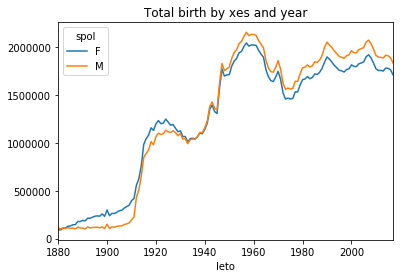

In [19]:
#narišemo
#kako se spreminja številorojenih ženskih in moških po letih
total_births.plot(title= 'Total birth by sex and year')

In [20]:
#kakšna je verjetnost, da otrok dobi določeno ime
def add_prop(group):
    group['prop'] = group['stevilo'] / group['stevilo'].sum()
    return group

In [23]:
names = names.groupby(['leto', 'spol']).apply(add_prop)
names.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [25]:
#check: vsota verjetnosti po ženskih in po moških imenih mora biti 1
names.groupby(['leto', 'spol'])['prop'].sum().head(10)

leto  spol
1880  F       1.0
      M       1.0
1881  F       1.0
      M       1.0
1882  F       1.0
      M       1.0
1883  F       1.0
      M       1.0
1884  F       1.0
      M       1.0
Name: prop, dtype: float64

In [26]:
#za vsak spol in leto izberemo 1000 najpogostejših imen
def get_top1000(group):
    return group.sort_values(by= 'stevilo', ascending=False)[:1000]

In [27]:
grouped = names.groupby(['leto', 'spol'])

In [28]:
top1000 = grouped.apply(get_top1000)

In [29]:
top1000.head()

ime spol  stevilo  leto      prop
leto spol                                           
1880 F    0       Mary    F     7065  1880  0.077643
          1       Anna    F     2604  1880  0.028618
          2       Emma    F     2003  1880  0.022013
          3  Elizabeth    F     1939  1880  0.021309
          4     Minnie    F     1746  1880  0.019188

In [32]:
#vržemo ven indexa leto in spol 
top1000.reset_index(inplace=True, drop = True)

In [33]:
top1000.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [34]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275877 entries, 0 to 275876
Data columns (total 5 columns):
ime        275877 non-null object
spol       275877 non-null object
stevilo    275877 non-null int64
leto       275877 non-null int64
prop       275877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.5+ MB


In [35]:
#naredimo dva dataseta: enega za ženska in drugega za moška imena
boys = top1000[top1000['spol'] == 'M']
girls = top1000[top1000['spol'] == 'F']

In [36]:
girls.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [37]:
#radi bi narisali, kako se pogostnost določenega imena spreminjala po letih
#malo moramo preurediti podatke
total_births = top1000.pivot_table('stevilo', index = 'leto', columns = 'ime', aggfunc=sum)

In [38]:
total_births.head()

ime,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
leto,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN


In [ ]:
#če določenega imena za določeno leto ni, se izpiše Nan
#zaradi Nan(ki so tipa floating), so podatki v tabeli tipa float in ne integer
#--to je optimizacija, ki jo dela pandas

In [39]:
#izberemo nekaj imen
subset = total_births[['John', 'Harry', 'Marry', 'Khaleesi', 'Jon', 'Arya']]

In [40]:
subset.head()

ime,John,Harry,Marry,Khaleesi,Jon,Arya
leto,,,,,,
1880,9701.0,2158.0,NaN,NaN,NaN,NaN
1881,8795.0,2002.0,NaN,NaN,NaN,NaN
1882,9597.0,2246.0,6.0,NaN,NaN,NaN
1883,8934.0,2116.0,6.0,NaN,NaN,NaN
1884,9428.0,2338.0,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f405996dfd0>,
      dtype=object)

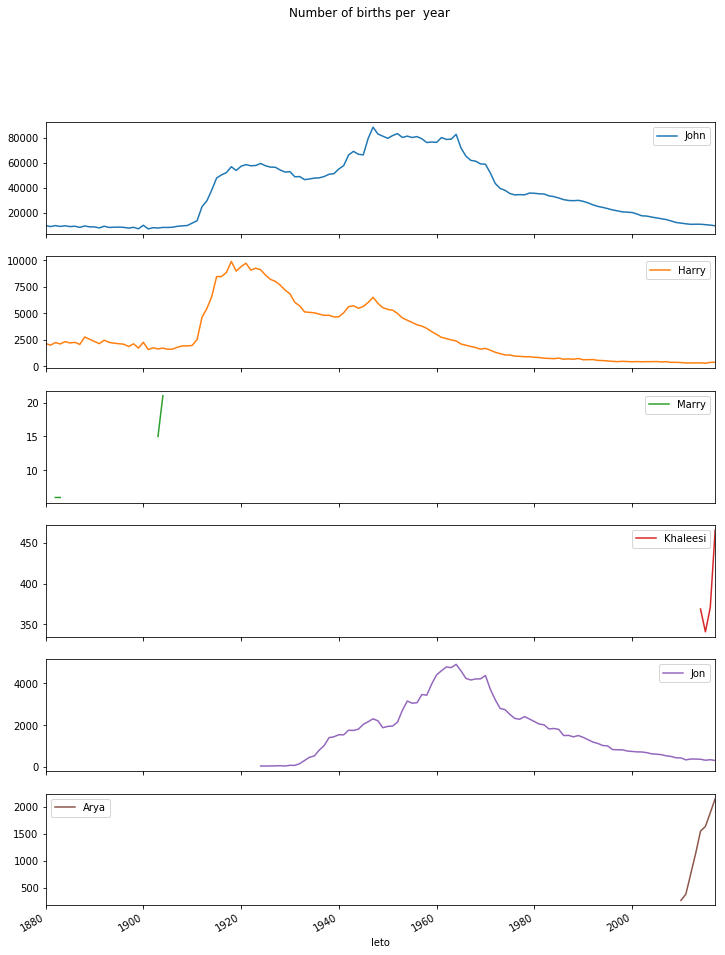

In [41]:
#narišemo
subset.plot(subplots=True, figsize = (12,16), grid =False, title='Number of births per  year')

In [42]:
#preverimo
table = top1000.pivot_table('prop', index = 'leto', columns = 'spol', aggfunc=sum)

In [43]:
#koliko procentov imen se je nahajalo v top1000 imenih
#npr 1881 so bila vsa imena v top 1000 (bilo je manj kot 1000 različnih imen)
table.head()

spol,F,M
leto,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


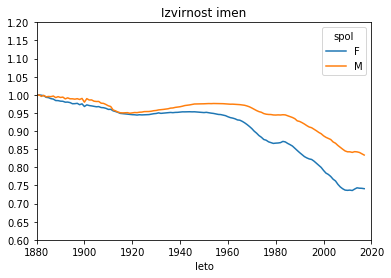

In [44]:
#narišemo graf
#vidimo, da izvirnost narašča, vse več je različnih imen
table.plot(title='Izvirnost imen', yticks= np.linspace(0.6,1.2,13), xticks= range(1880,2030,20))